In [5]:
# Input a coin and the past x days- return three lists: dates, subscriber growth, and total subscribers
def get_reddit_metrics_data(coin):
    
    # Website URL
    URL = 'http://redditmetrics.com/r/'
    temp = coin.replace(' ', '')
    
    url = URL + temp
#     print(coin)

    # Open url with urllib
    with urlopen(url) as url:
        web = url.read()

    # Create instance of soup and grab script tag containing data
    soup = BeautifulSoup(web, 'lxml')
    data = soup.find_all("script")[8].string
    data = data.split()

    # Parse Subscriber Growth Data
    sub_growth_start = data.index('element:')
    assert data[sub_growth_start + 1] == "'subscriber-growth',"
    sub_growth_end = data.index("pointSize:'',")
    subscriber_growth = data[sub_growth_start:sub_growth_end]
#     print(len(subscriber_growth))

    ##### SUBSCRIBER GROWTH- Parse Total Subscriber Growth Data ######
    # Parse Dates and return a list of dates
    date_pattern = re.compile("'\d{4}(?P<sep>[-/])\d{2}(?P=sep)\d{2}'")
    dates = list(filter(date_pattern.match, subscriber_growth))
    dates = [replace(x) for x in dates]
    dates = [datetime.strptime(x, '%Y-%m-%d') for x in dates]

    # Parse Values
    value_pattern = re.compile("\d*}")
    # print(subscriber_growth)
    subgrowth_values = list(filter(value_pattern.match, subscriber_growth))
    subgrowth_values = [replace(x) for x in subgrowth_values]
    subgrowth_values = list(map(int, subgrowth_values))
    
    ##### TOTAL SUBSCRIBERS ######
    # Get Total Subscribers data  
    data_1 = data[sub_growth_end+1:]
    total_sub_start = data_1.index('element:')
    assert data_1[total_sub_start + 1] == "'total-subscribers',"
    total_sub_end = data_1.index("pointSize:'',")
    total_subscribers = data_1[total_sub_start:total_sub_end]
    
    # Parse Values
    totalsubs_values = list(filter(value_pattern.match, total_subscribers))
    totalsubs_values = [replace(x) for x in totalsubs_values]
    totalsubs_values = list(map(int, totalsubs_values))
    
#     print(totalsubs_values)
    
    
    return dates, subgrowth_values, totalsubs_values

# Replace commas, quotes, and brackets with blanks
def replace(string): 
    x = string.replace(",", '')
    y = x.replace("'", '')
    z = y.replace("}", '')
    return z

def graph(dates, values, title, xlabel, ylabel, pastxdays = 100):
    
    last_x_days_dates = dates[-pastxdays:]
    last_x_days_values = values[-pastxdays:]
    plt.figure(figsize=(10,5))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(last_x_days_dates, last_x_days_values)
    plt.show()


# Get historical data
def historicalprices(ticker, currency='USD'):
        endpoint = requests.get('https://min-api.cryptocompare.com/data/histoday?aggregate=1&e=CCCAGG&extraParam'
                                '=CryptoCompare&fsym=' + ticker.upper() + '&limit=100000&tryConversion=false&tsym=' +
                                currency.upper())
        endpoint = endpoint.json()

        closeprice = [data['close'] for data in endpoint['Data']]
        closeprice = list(map(float, closeprice))
        time = [data['time'] for data in endpoint['Data']]
        time = [datetime.fromtimestamp(unixtime).strftime('%Y-%m-%d') for unixtime in time]
        time = [datetime.strptime(x, '%Y-%m-%d') for x in time]

#         dateandclose = np.column_stack((time, close))
        return time, closeprice

HELLO
STARTING
Bitcoin


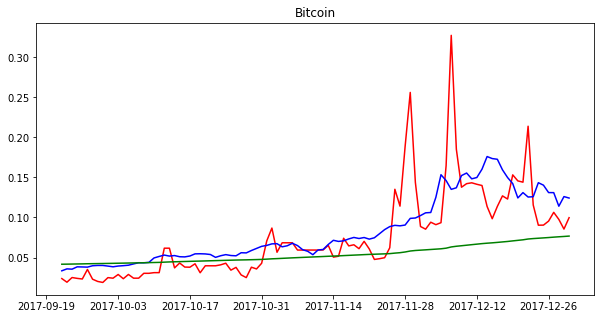

Litecoin


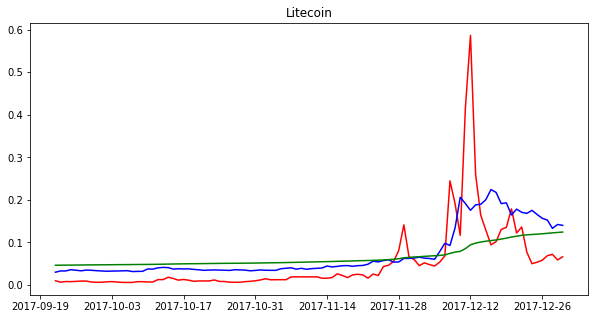

Ripple


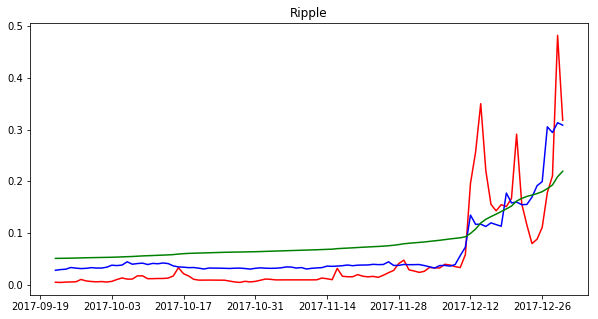

Ethereum


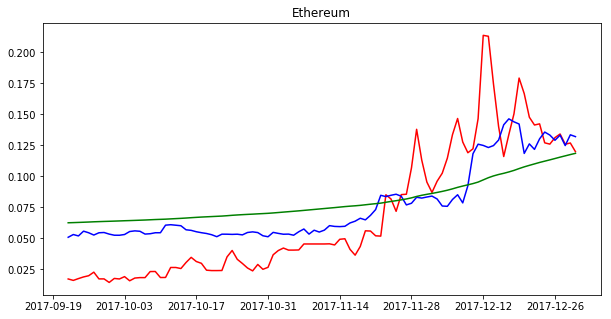

NEO


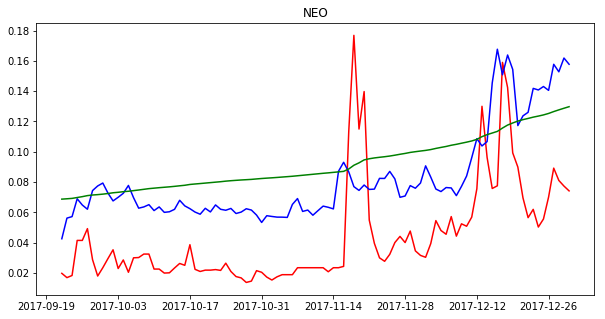

In [6]:
import time
from urllib.request import urlopen
import json
import re
from bs4 import BeautifulSoup
from pprint import pprint
from datetime import datetime
import matplotlib.pyplot as plt
import requests
import numpy as np
from sklearn import preprocessing

if __name__ == "__main__":
    print('HELLO')
    ### Name: Symbol
    coinlist = {'Bitcoin': 'BTC', 'Litecoin': 'LTC', 'Ripple': 'XRP', 'Ethereum': 'ETH', 'NEO': 'NEO'}
    
    failed = []
    print('STARTING')
    for coin in coinlist:
        try:
            print(coin)
            time.sleep(3)
#             print(coin)
#             print(coin, coinlist[coin])
            dates, subgrowth, totalsub = get_reddit_metrics_data(coin)
            _, closeprice = historicalprices(coinlist[coin], 'USD')
    #         print(closeprice)
    #         graph(dates, closeprice, coin, 'Date', 'Price', pastxdays = 100)

            normalized_subgrowth = preprocessing.normalize([subgrowth])
            normalized_price = preprocessing.normalize([closeprice])
            normalized_totalsub = preprocessing.normalize([totalsub])

            plt.figure(figsize=(10,5))
            plt.title(coin)
            plt.plot(dates[-100:], normalized_subgrowth[0][-100:], 'r')
            plt.plot(dates[-100:], normalized_price[0][-100:], 'b')
            plt.plot(dates[-100:], normalized_totalsub[0][-100:], 'g')
            plt.show()
        except:
            print('FAILED FOR: ' + coin)
            failed.append(coin)
            